<a href="https://colab.research.google.com/github/AzadehZahedi/Data-Analysis/blob/main/Beijing_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beijing Houses

In this project, we deal with real data from houses in Beijing, perform comprehensive and useful analyses on this dataset, and display the results of the analyses by drawing graphs.

This project consists of 5 main parts:

1- In the first part, the data is read and columns that are not needed are removed. Also, missing values ​​are considered.

2- In the second part, the columns are converted to the appropriate format and outliers are removed.

3- In the third part, new features are created using the existing features, which will be very useful in the next two steps.

4- In the fourth part, we use the latitude and longitude of the houses to show them on the map to get an overview of that area.

5- In the last step, we analyze the transactions over time using the time of the transactions.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
housing = pd.read_csv('housing_data.csv', encoding='gbk')
housing.head()

<ipython-input-3-672d6aff5c59>:1: DtypeWarning: Columns (2,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('housing_data.csv', encoding='gbk')


,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,1030.0,198.00,...,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,297.5,134.00,...,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,392.0,81.00,...,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


In [ ]:
housing_dropped = housing.drop(columns=['Unnamed: 0', 'url', 'id', 'Cid'], axis=1)

In [ ]:
housing_null = pd.DataFrame(housing_dropped.isna().sum())
housing_null

,0
Lng,0
Lat,0
tradeTime,0
DOM,157977
totalPrice,0
square,0
livingRoom,0
drawingRoom,0
kitchen,0
bathRoom,0


<Axes: >

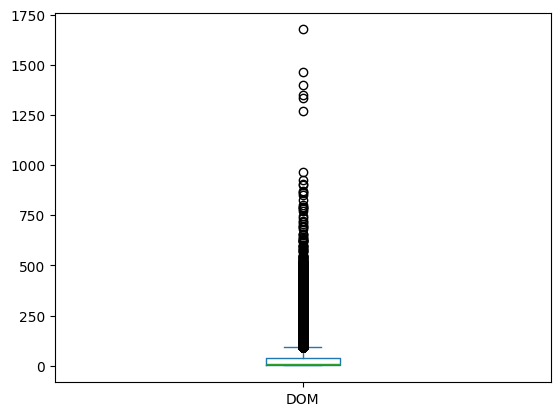

In [ ]:
import matplotlib.pyplot as plt
housing_dropped['DOM'].plot(kind = 'box')

The DOM column, which indicates the number of days the ad has been on the site, has a lot of missing values, and if we were to delete rows with missing DOM values, almost half of our data would be deleted! On the other hand, this feature contains important results about houses, and deleting the DOM column is not a sensible thing to do. So we should think about filling in the blank values ​​of this column.

In [ ]:
housing_no_missing = housing_dropped.copy()

housing_no_missing['DOM'].fillna(housing_no_missing['DOM'].dropna().mode()[0], inplace=True)

housing_no_missing.dropna(subset=['elevator', 'subway'], inplace=True)

housing_no_missing.head()

<ipython-input-7-886b9d91480e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_no_missing['DOM'].fillna(housing_no_missing['DOM'].dropna().mode()[0], inplace=True)


,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


In [ ]:
housing_categorical = housing_no_missing.copy()
housing_categorical.replace({'elevator':{1 : 'has elevator', 0 : 'no elevator'},
                            'subway':{1 : 'has subway', 0 : 'no subway'},
                             'buildingStructure':{1: 'unknown', 2: 'mixed', 3: 'brick and wood', 4: 'concrete', 5: 'steel', 6: 'steel-concrete composite'},
                             'renovationCondition':{1: 'other', 2: 'rough', 3: 'Simplicity', 4: 'hardcover'}
                            }, inplace=True)

housing_categorical.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,rough,mixed,0.333,no elevator,has subway,1


Some houses have a Chinese phrase that means unknown. The number of such houses is small, so we can remove houses with unknown construction year

In [ ]:
housing_construction = housing_categorical.copy()
housing_construction = housing_construction.loc[housing_construction.constructionTime.str.contains('未知') == False]
housing_construction.constructionTime = housing_construction.constructionTime.astype('int32')

<ipython-input-9-b0318cc273b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_construction.constructionTime = housing_construction.constructionTime.astype('int32')


The floor column starts with a Chinese word followed by a number. The number after the Chinese character indicates the height of the house. After using Google Translate, we found that those words are equivalent to high, low, and medium. We'll throw away the Chinese words here and just keep the numbers.

In [ ]:
housing_floor = housing_construction.copy()
housing_floor.floor = housing_floor.floor.apply(lambda i : ''.join(c for c in i if c.isdigit())).astype(int)

Price outliers

<Axes: >

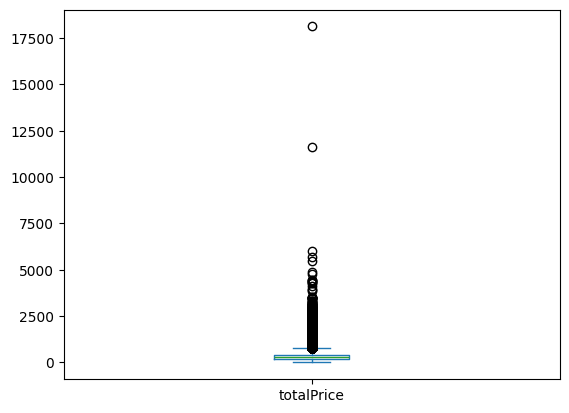

In [ ]:
housing_floor.totalPrice.plot(kind = 'box')

In [ ]:
Q1 = housing_floor['totalPrice'].quantile(.25)
Q3 = housing_floor['totalPrice'].quantile(.75)
IQR = Q3 - Q1

housing_no_outlier = housing_floor.drop(housing_floor[ (housing_floor.totalPrice < Q1-1.5*IQR) | (housing_floor.totalPrice> Q3+1.5*IQR)].index)
print('Number of removed outliers : ', housing_floor.shape[0] - housing_no_outlier.shape[0])

Number of removed outliers :  14496


<Axes: >

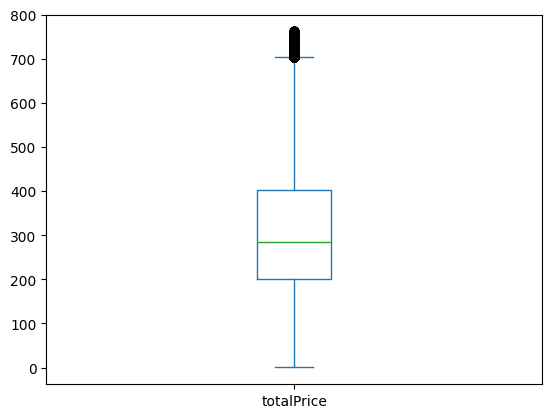

In [ ]:
housing_no_outlier.totalPrice.plot(kind = 'box')

In [ ]:
housing_no_outlier.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1
5,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import math
from math import radians

Adding New Features

First, we calculated the distance from each house to the center of the capital of China and stored it in a column called distanceToCapital. The longitude and latitude of the center of the capital of China are 116.4074 and 39.9042, respectively.

In [ ]:
housing_capital = housing_no_outlier.copy()

capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

Lat = housing_capital['Lat'].apply(lambda x: radians(x))
Lng = housing_capital['Lng'].apply(lambda x: radians(x))

x = np.arccos(np.sin(Lat)*np.sin(capital_Lat) + np.cos(Lat)*np.cos(capital_Lat)*np.cos(capital_Lng-Lng))
housing_capital['distanceToCapital'] = x*6371.0088

In this dataset, the transaction price and the area of ​​each house are known. But the price per square meter of the house is not known. In the pricePerSquare column, we calculated and stored the price per square meter of the house. The total price is based on million yuan. So the price we calculated for each square meter of the house must be multiplied by a thousand to get the price based on yuan.

In [ ]:
housing_PPS = housing_capital.copy()

housing_PPS['pricePerSquare'] = (housing_PPS['totalPrice'] / housing_PPS['square'] )*1000

In [ ]:
housing_PPS.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
5,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


<ipython-input-20-e92f4d46fa90>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  housing_PPS.hist(ax = ax, bins = 20);


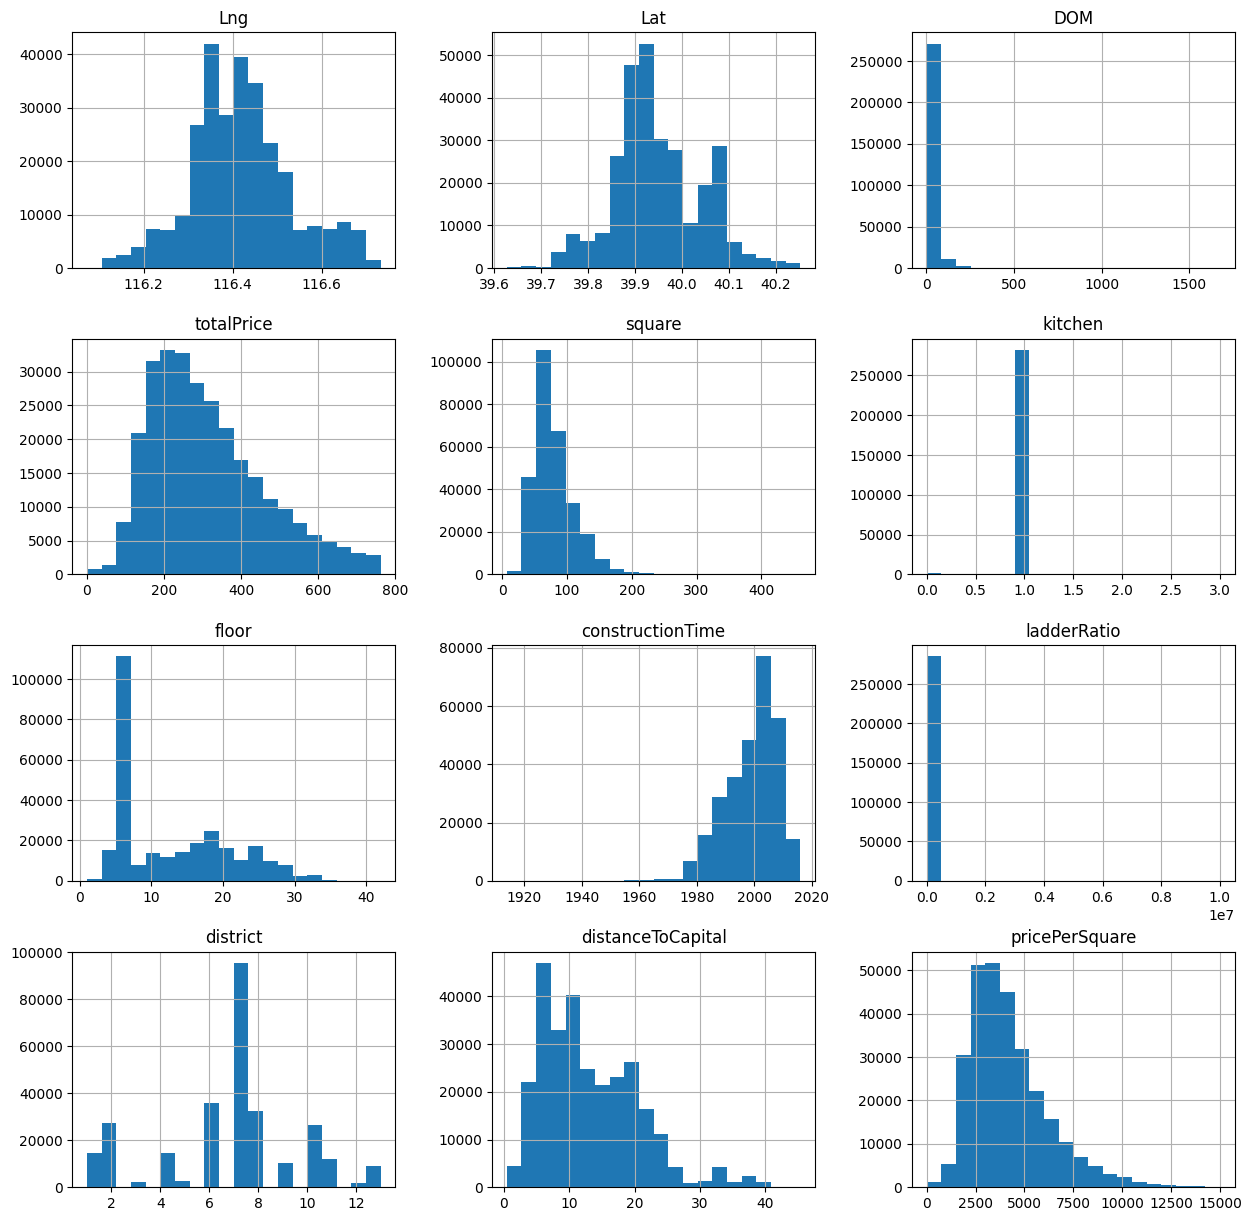

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 20);

<Axes: xlabel='distanceToCapital', ylabel='pricePerSquare'>

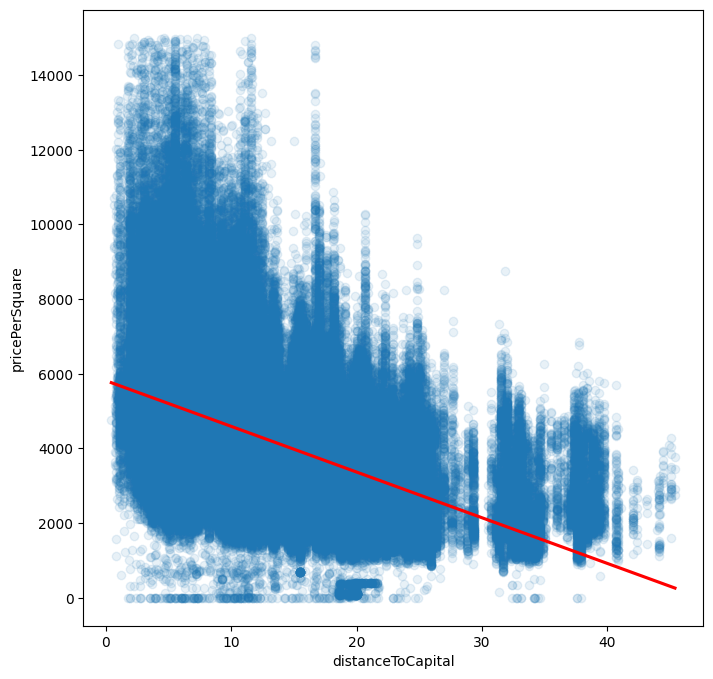

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1})

Text(0, 0.5, 'Density')

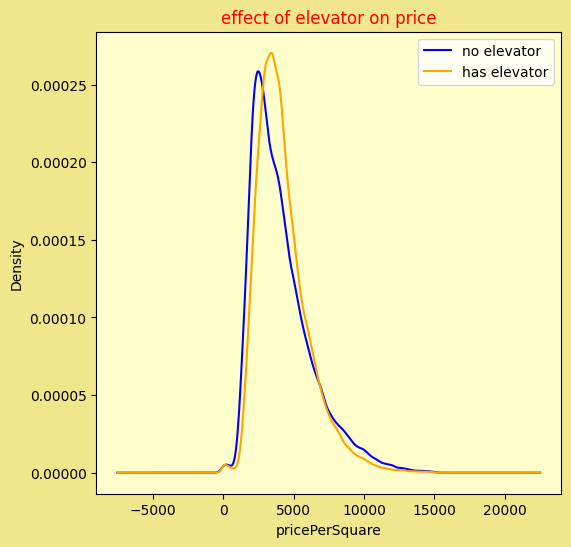

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

H1 = housing_PPS[housing_PPS.elevator == 'no elevator']
H1['pricePerSquare'].plot(ax = ax, kind = 'kde', label='no elevator', color='blue')

H2 = housing_PPS[housing_PPS.elevator == 'has elevator']
H2['pricePerSquare'].plot(ax = ax, kind = 'kde', label='has elevator', color='orange')

ax.legend()

ax.set_facecolor("#ffffcc")
fig.set_facecolor("khaki")
ax.set_title("effect of elevator on price", color='red')
ax.set_xlabel("pricePerSquare")
ax.set_ylabel("Density")

In [ ]:
housing_extended = housing_PPS

We use one-hundredth of the lines to draw graphs.

In [ ]:
housing_sample = housing_extended.iloc[:-100:100]
housing_sample.shape

(2850, 20)

Given the latitude and longitude of the houses, we can use a scatterplot to plot the houses on the screen and see their relative positions. The scale of the horizontal and vertical axes of the graph should be the same.

Text(0.5, 1.0, 'scatter plot')

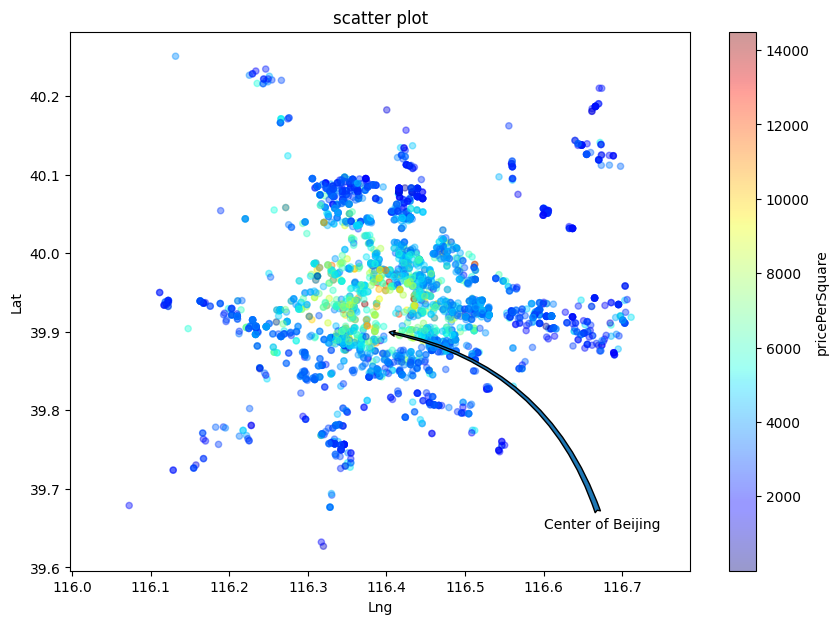

In [ ]:
from matplotlib.patches import ConnectionStyle
connectionstyle = ConnectionStyle("Arc3", rad=0.3)


fig, ax = plt.subplots()
fig.set_size_inches(10,7)

housing_sample.plot(ax=ax, kind='scatter', x='Lng', y='Lat', alpha=0.4,
                    c='pricePerSquare', cmap=plt.get_cmap("jet"), colorbar=True)

ax.annotate("Center of Beijing", xy=(116.40,39.90), xytext=(116.6,39.65), arrowprops=dict(arrowstyle="fancy", connectionstyle=connectionstyle))

ax.axis('equal')
ax.set_title('scatter plot')


You can see that most of the houses are concentrated in one spot, which is the center of the Chinese capital. Also, the most expensive houses (based on per square meter) are located near the city center, and how prices decrease as you move away from the city center.

Now let's use the 'square' and 'district' columns to draw the scatter plot and color the points.

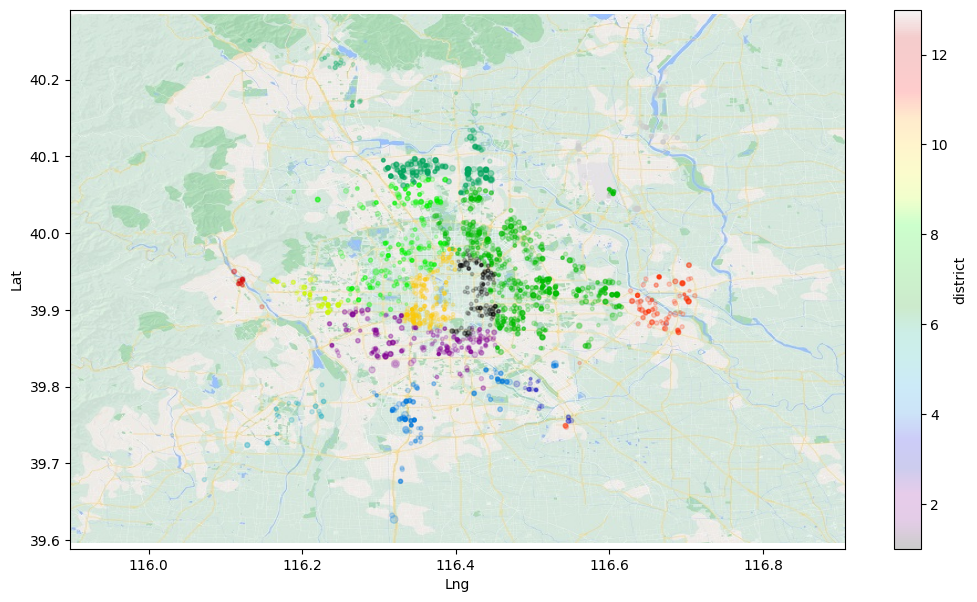

In [ ]:
import matplotlib.image as mpimg
beijing_img = mpimg.imread('map1.jpg')


fig, ax=plt.subplots()
fig.set_size_inches(12.5,7)

housing_sample.plot(ax=ax, kind='scatter', x = 'Lng' , y ='Lat', alpha = 0.2,
                    c='district', cmap=plt.get_cmap("nipy_spectral"), colorbar=True,
                   s=housing_sample['square']/10)
ax.axis('equal')

ax.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])

In the last step of the project, we obtain a comprehensive report on the characteristics of each region. We also perform two time series analyses using the time of transactions.

In [ ]:
housing_extended['tradeTime'] = pd.to_datetime(housing_extended['tradeTime'])

In the first part, we want to get information for each district. We created a dataframe called 'districts_df' and set its index to the district column.

In [ ]:
districts_df = housing_extended.groupby(by='district')

districts_price = districts_df['pricePerSquare'].mean()

def has_elevator(x):
    all = x.count()
    has_elevator = x.value_counts()['has elevator']
    return (has_elevator / all) * 100
districts_elevator = districts_df['elevator'].agg(has_elevator)

def has_subway(x):
    all = x.count()
    has_subway = x.value_counts()['has subway']
    return (has_subway / all) * 100
districts_subway = districts_df['subway'].agg(has_subway)

districts_square = districts_df['square'].mean()

def average_age(x):
    age = 2021 - x
    return age.mean()
districts_buildeng = districts_df['constructionTime'].agg(average_age)

districts_structure = districts_df['buildingStructure'].agg(lambda x : x.value_counts().idxmax())



dictionary = {'pricePerSquare mean': districts_price, '% houses with elevator': districts_elevator, '% houses with subway': districts_subway,
              'square mean': districts_square, 'buildeng age mean': districts_buildeng, 'frequent buildingStructure': districts_structure
}
districts_df = pd.DataFrame(dictionary)

districts_df.head()

,pricePerSquare mean,% houses with elevator,% houses with subway,square mean,buildeng age mean,frequent buildingStructure
district,,,,,,
1,5981.774965,56.216550,93.488404,67.047856,25.151709,steel-concrete composite
2,3805.924811,68.647623,61.825544,76.951352,20.639123,steel-concrete composite
3,3130.333142,66.636691,47.032374,92.071484,15.494604,steel-concrete composite
4,2999.928821,39.983398,43.027117,86.322272,18.324364,mixed
5,2841.761483,80.077031,39.005602,89.297990,11.271359,steel-concrete composite


Predicting house price trends using plot

<ipython-input-33-7fbcbfc70d3c>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = monthly_data.resample('M', on='tradeTime').mean()


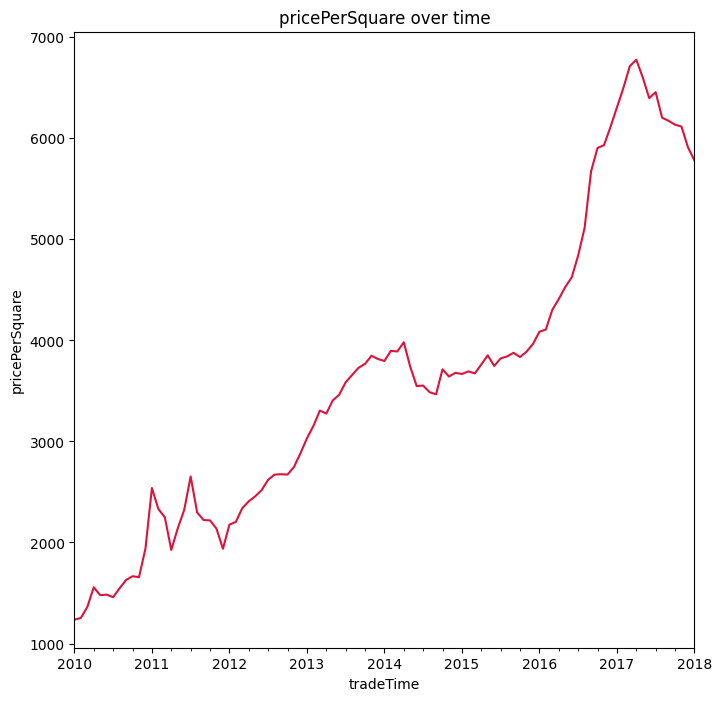

In [ ]:
fig1, ax1=plt.subplots()
fig1.set_size_inches(8,8)

monthly_data = housing_extended[['tradeTime', 'pricePerSquare']]
monthly_data = monthly_data[monthly_data.tradeTime > '2010']
monthly_data = monthly_data.resample('M', on='tradeTime').mean()
monthly_data = monthly_data.reset_index()

monthly_data.plot(ax=ax1, x='tradeTime', y='pricePerSquare', color='crimson', legend=False)
ax1.set_ylabel('pricePerSquare')
ax1.set_title('pricePerSquare over time');

Forecast chart of the number of house transactions near the city center

<ipython-input-34-a9620f75d8f3>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  three_month = three_month.resample('3M', on='tradeTime')


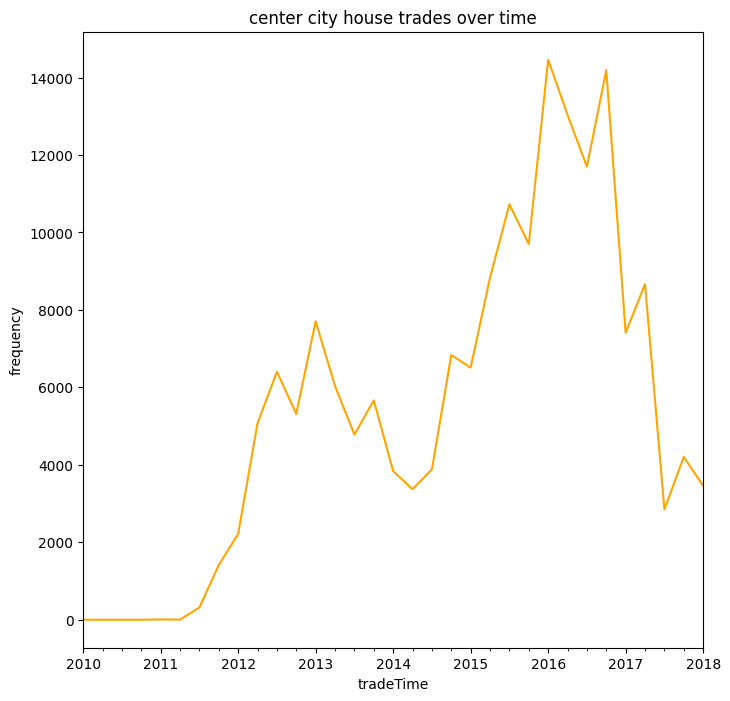

In [ ]:
fig2, ax2=plt.subplots()
fig2.set_size_inches(8,8)

three_month = housing_extended[['tradeTime', 'distanceToCapital']]
three_month = three_month[three_month.tradeTime > '2010']
three_month = three_month.resample('3M', on='tradeTime')
three_month = three_month.distanceToCapital.apply(lambda x: (x<15).sum())
three_month.plot(ax=ax2, x='tradeTime', y='distanceToCapital', color='orange')
ax2.set_ylabel('frequency')
ax2.set_title('center city house trades over time');